# Global Climate Action Progress and Ambition

Create a visualization with python that adds to the trends widget a measure of the reduction achieved and the reduction needed based on a baseline level of emissions for a base year, and a linear progression towards the target year.

![progress](https://ipfs.io/ipfs/bafybeidfnqlqsbx4c6b7jqxunn3lzaj4ka4q4u3dy6nqxqjyutbpjihr54/progress_rate.jpg)

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import openclimate as oc
import pandas as pd
import tqdm
from utils import get_emissions
from utils import get_target
from utils import actor_parts
from utils import create_data_dict

In [2]:
def tonnes_to_s(value, original_min, orginal_max, new_min, new_max):
    """convert values to point size"""
    return ((value - original_min) * (new_max - new_min) / (original_max - original_min)) + new_min

In [3]:
# setup python client
client = oc.Client()
client.jupyter

# Create DataFrame

In [4]:
country_code = 'CA'
datasource_id = 'ECCC:GHG_inventory:2022-04-13'

parts = actor_parts(
    actor_id = country_code, 
    part_type = 'adm1'
)

data_list = [
    create_data_dict(actor_id=actor_id, datasource_id=datasource_id) 
    for actor_id in parts['actor_id']
]

df = pd.DataFrame(data_list).dropna()

# Sort values by progress_rate

In [5]:
df.sort_values(by='progress_rate', ascending=False)

,actor_id,baseline_emissions,baseline_year,reduction_pledged,inventory_emissions,inventory_year,target_year,target_emissions,progress_rate,percentage_reduction,reduction_achieved,reduction_required
8,CA-ON,204370140.0,2005.0,30.0,149584918.0,2020.0,2030.0,1.430591e+08,148.927013,4.362619,54785222.0,3.678663e+07
3,CA-NB,19781112.0,2005.0,46.0,12440907.0,2020.0,2030.0,1.068180e+07,134.446161,14.139697,7340205.0,5.459587e+06
5,CA-NS,22963779.0,2005.0,53.0,14596446.0,2020.0,2030.0,1.079298e+07,114.582046,26.057507,8367333.0,7.302482e+06
9,CA-PE,1899135.0,2005.0,30.0,1609972.0,2020.0,2030.0,1.329394e+06,84.589095,17.427477,289163.0,3.418443e+05
6,CA-NT,1725190.0,2005.0,50.0,1401465.0,2020.0,2030.0,8.625950e+05,62.548666,38.450479,323725.0,5.175570e+05
12,CA-YT,647988.0,2010.0,30.0,600610.0,2020.0,2030.0,4.535916e+05,48.743701,24.478181,47378.0,9.719820e+04
10,CA-QC,84508702.0,1990.0,37.0,76241175.0,2020.0,2030.0,5.324048e+07,35.254228,30.168335,8267527.0,2.345116e+07
4,CA-NL,9899129.0,2001.0,30.0,9500844.0,2020.0,2030.0,6.929390e+06,20.470107,27.065529,398285.0,1.945691e+06
1,CA-BC,62658881.0,2007.0,40.0,61746788.0,2020.0,2030.0,3.759533e+07,6.438445,39.113710,912093.0,1.416636e+07
2,CA-MB,20530551.0,2005.0,33.0,21674064.0,2020.0,2030.0,1.375547e+07,-28.130361,36.534887,-1143513.0,4.065049e+06


# Plot time series

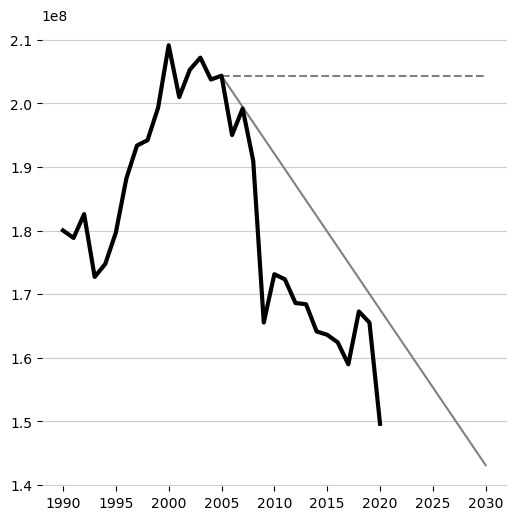

In [6]:
actor_id = 'CA-ON'
df_emissions = get_emissions(actor_id = actor_id, datasource_id=datasource_id)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

baseline_year = df['baseline_year'].loc[df['actor_id'] == actor_id]
target_year = df['target_year'].loc[df['actor_id'] == actor_id]
baseline = df['baseline_emissions'].loc[df['actor_id'] == actor_id]
target = df['target_emissions'].loc[df['actor_id'] == actor_id]

ax.plot([baseline_year, target_year], [baseline, baseline], '--', color=[0.5,0.5,0.5])
ax.plot([baseline_year, target_year], [baseline, target], '-', color=[0.5,0.5,0.5])
ax.plot(df_emissions['year'], df_emissions['total_emissions'], color='k', linewidth=3)

# Turn off the display of all ticks.
ax.tick_params(which='both',     # Options for both major and minor ticks
               top='off',        # turn off top ticks
               left='off',       # turn off left ticks
               right='off',      # turn off right ticks
               bottom='off')     # turn off bottom ticks

# Remove x tick marks
plt.setp(ax.get_xticklabels(), rotation=0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# grid and tick marks
ax.grid(axis='y',
        which='major',
        color=[0.8, 0.8, 0.8], linestyle='-')

ax.set_axisbelow(True)

# Plot Porgress Rate bubble chart

In [7]:
column_name = 'inventory_emissions'

# Define the desired minimum and maximum values for scaling
new_min = 10   # Desired minimum value
new_max = 500  # Desired maximum value

# Identify the minimum and maximum values of the column
original_min = df[column_name].min()
original_max = df[column_name].max()

# Apply the scaling formula to each value in the column
df[f'{column_name}_scaled'] = df[f'{column_name}'].apply(
    lambda x: tonnes_to_s(x, orginal_max=original_max, original_min=original_min, new_min=new_min, new_max=new_max)
)

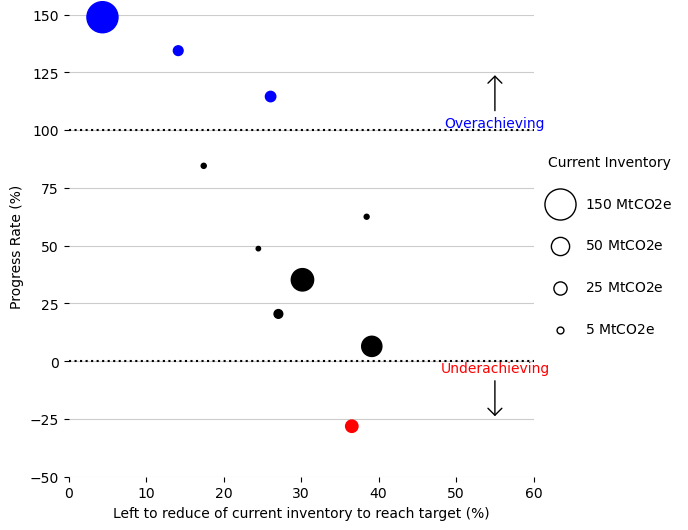

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Set color based on progress_rate values
colors = [
    'blue' if rate > 100 
    else 'black' if 0 <= rate <= 100 
    else 'red' 
    for rate in df['progress_rate']
]

scatter = ax.scatter(df['percentage_reduction'], df['progress_rate'], s=df['inventory_emissions_scaled'], c=colors, clip_on=False)

# Turn off the display of all ticks.
ax.tick_params(which='both',     # Options for both major and minor ticks
               top='off',        # turn off top ticks
               left='off',       # turn off left ticks
               right='off',      # turn off right ticks
               bottom='off')     # turn off bottom ticks

# Remove x tick marks
plt.setp(ax.get_xticklabels(), rotation=0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# grid and tick marks
ax.grid(axis='y',
        which='major',
        color=[0.8, 0.8, 0.8], linestyle='-')

ax.set_axisbelow(True)

ax.axhline(y=100, xmin=0, xmax=1, color='black', linestyle='dotted')
ax.axhline(y=0, xmin=0, xmax=1, color='black', linestyle='dotted')
ax.set_ylabel("Progress Rate (%)")
ax.set_xlabel("Left to reduce of current inventory to reach target (%)")
ax.set_ylim(-50, 150)
ax.set_xlim(0, 60)

# Determine the maximum x-value
max_x = df['percentage_reduction'].max()
max_x = 50

# Add an arrow and annotation at the 100 level on the y-axis
ax.annotate('Overachieving', xy=(max_x*1.1, 125), xytext=(max_x*1.1, 100), annotation_clip=False,
            arrowprops=dict(arrowstyle='->,head_width=0.5,head_length=0.5'), ha='center', va='bottom', color='blue')

# Add an arrow and annotation at the 100 level on the y-axis
ax.annotate('Underachieving', xy=(max_x*1.1, -25), xytext=(max_x*1.1, 0), annotation_clip=False,
            arrowprops=dict(arrowstyle='->,head_width=0.5,head_length=0.5'), ha='center', va='top', color='red')


# Create a legend for the scatter circles
s150 = tonnes_to_s(value=150_000_000, orginal_max=original_max, original_min=original_min, new_min=new_min, new_max=new_max)
s50 = tonnes_to_s(value=50_000_000, orginal_max=original_max, original_min=original_min, new_min=new_min, new_max=new_max)
s25 = tonnes_to_s(value=25_000_000, orginal_max=original_max, original_min=original_min, new_min=new_min, new_max=new_max)
s5 = tonnes_to_s(value=5_000_000, orginal_max=original_max, original_min=original_min, new_min=new_min, new_max=new_max)

legend_elements = [plt.scatter([], [], s=s150, marker='o', color='white', edgecolor='black', label='150 MtCO$2$e'),
                   plt.scatter([], [], s=s50, marker='o', color='white', edgecolor='black', label='50 MtCO$2$e'),
                   plt.scatter([], [], s=s25, marker='o', color='white', edgecolor='black', label='25 MtCO$2$e'),
                   plt.scatter([], [], s=s5, marker='o', color='white', edgecolor='black', label='5 MtCO$2$e')]

# Create the legend on the side of the graph
ax.legend(
    handles=legend_elements, 
    title="Current Inventory", #"$\\bf{Current\\ Inventory}$",
    loc='center left', 
    bbox_to_anchor=(1, 0.5), 
    frameon=False,
    labelspacing=2
)

#fig.savefig('./CA_provinces_progress_rate.png', dpi=300, facecolor='white', bbox_inches='tight')